# Gradient Descent

Based on Homework at https://www.user.tu-berlin.de/mtoussai/teaching/13-Optimization/
From M. Toussaint

In [1]:
using Plots
using LinearAlgebra

gr()

Plots.GRBackend()

### Problem 1

Consider the following functions which map $\mathbb{R}^n \to \mathbb{R}$

$$f_{sq}(x) = x^T x$$
$$f_{hole}(x) = 1 - \exp(-x^T x) $$

These would be fairly simple to optimize. We change the conditioning ("skewedness of the Hessian") of these functions to make them a bit more interesting.

Let $c \in \mathbb{R}$ be the conditioning parameter; let $C$ be the diagonal matrix with entries $C(i; i) = c^\frac{i - 1}{2 (n - 1)}$. We define the
test functions.

$$f_{sq}^c(x) = f_{sq}(Cx)$$
$$f_{hole}^c(x) = f_{hole}(Cx)$$

In the following, use $c = 100$

Implement these functions and display them over $x \in [-1,1]^2$.

##### First I will do this for the $x \in \mathbb{R}^2$ case

In [2]:
fsq2(x, y) = x^2 + y^2;
fhole2(x, y) = 1 - exp(-fsq2(x, y));

getCVal(c, i, n) = c^((i - 1) / (2 * (n - 1)));

In [3]:
xVals = yVals = range(-1, stop = 1, length = 40)

-1.0:0.05128205128205128:1.0

Without the $C$ matrix

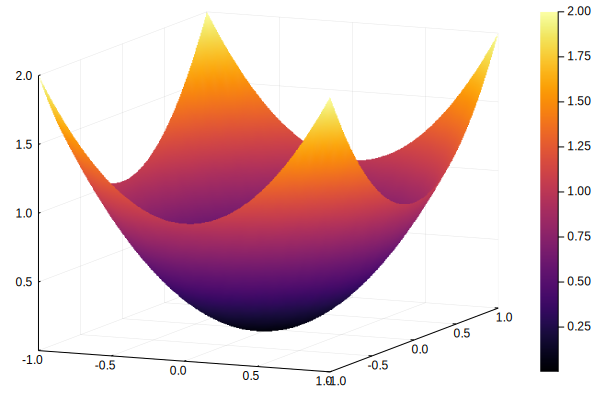

In [4]:
plot(xVals, yVals, fsq2, st = [:surface])

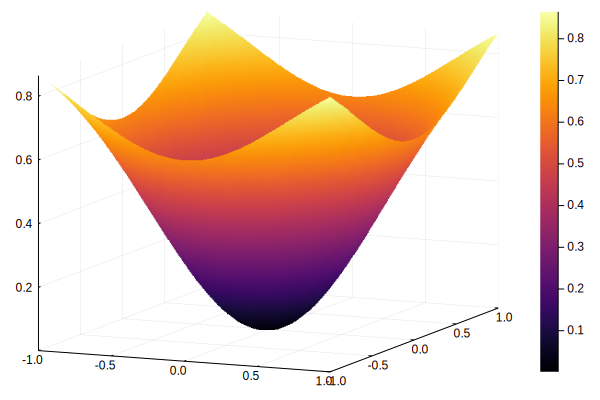

In [5]:
plot(xVals, yVals, fhole2, st = [:surface])

With the $C$ Matrix

In [6]:
function cMat(c, n)
    matA =  zeros(n, n)
    for i in [1:n;]
        matA[i, i] = getCVal(c, i, n)
    end
    return Diagonal(matA)
end

cMat (generic function with 1 method)

In [7]:
cMat(100, 2)

2×2 Diagonal{Float64,Array{Float64,1}}:
 1.0    ⋅ 
  ⋅   10.0

In [8]:
xyVec = transpose(cMat(100, 2) * vec([xVals, yVals]))

1×2 Transpose{Transpose{Float64,StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}},Array{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},1}}:
 [-1.0 -0.948718 … 0.948718 1.0]  [-10.0 -9.48718 … 9.48718 10.0]

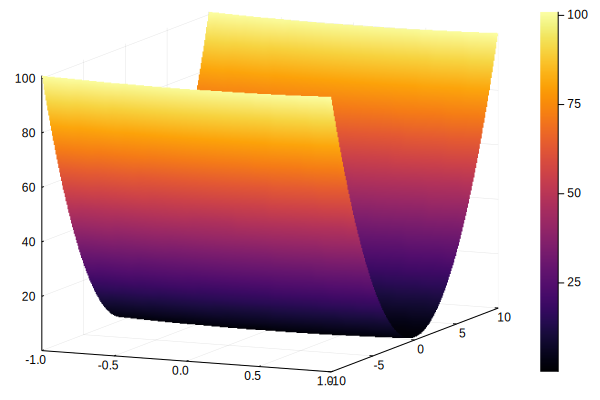

In [9]:
plot(xyVec[1]', xyVec[2]', fsq2, st = [:surface])

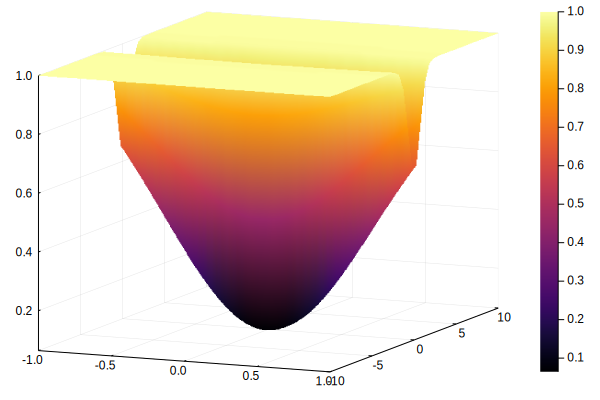

In [10]:
plot(xyVec[1]', xyVec[2]', fhole2, st = [:surface])

## Now we make a _naive_ Gradient Descent

In [99]:
function gradNaive(xInit, gradX, alphaStep, numIter = 10)
    # xInit is the initial point
    
    xNext = xInit
    
    iterations = []
    append!(iterations, xInit)
    
    for it in 1:numIter
        xNext = xNext - alphaStep * gradX(xNext)
        
        append!(iterations, xNext)
    end
    
    return iterations
    
end

gradNaive (generic function with 2 methods)

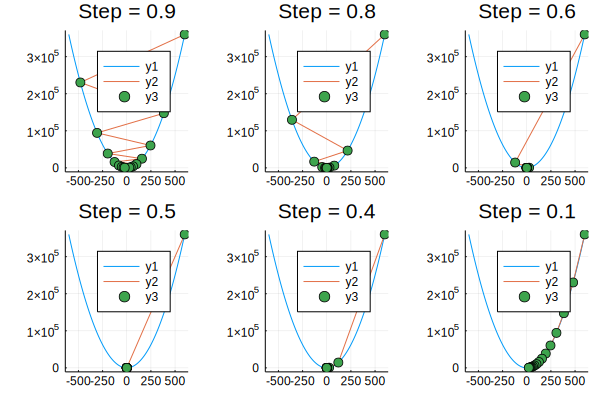

In [113]:
function compareStepSizes(x0, stepArray, thisLayout = (2,2))
    
    pltList = Any[]
    
    for (ind, alpha) in enumerate(stepArray)
        fsq1(x) = x^2
        dfdx1(x) = 2 * x

        xIterations = gradNaive(x0, dfdx1, alpha, 15)

        xRange = -x0:x0

        plt = plot(collect(xRange), fsq1, title = "Step = $alpha")
        plot!(xIterations, fsq1)
        scatter!(xIterations, fsq1, markersize=5)
        
        push!(pltList, plt)
    end
    
    plot(pltList..., layout = thisLayout)
end

xInit = 600
stepSizes = [0.9, 0.8, 0.6, 0.5, 0.4, 0.1]
layout = (2, 3)

compareStepSizes(xInit, stepSizes, layout)

## Now we make a _naive_ Gradient Descent with tolerance

In [119]:
function gradNaiveToler(xInit, gradX, alphaStep, tolerance = 0.5, maxIter = 10)
    # xInit is the initial point
    
    xNext = xInit
    xPrev = xInit
    xError = tolerance * 1000
    
    iterations = []
    append!(iterations, xInit)
    
    numIter = 1
    
    while xError > tolerance
        xPrev = xNext
        xNext = xNext - alphaStep * gradX(xNext)
        
        xError = abs(xPrev - xNext)
        
        append!(iterations, xNext)
        
        if numIter >= maxIter
           break
        else
            numIter += 1
        end
    end
    
    println("Finished in $numIter")
    
    return iterations
    
end

gradNaiveToler (generic function with 3 methods)

Finished in 44
Finished in 20
Finished in 8
Finished in 3
Finished in 8
Finished in 34


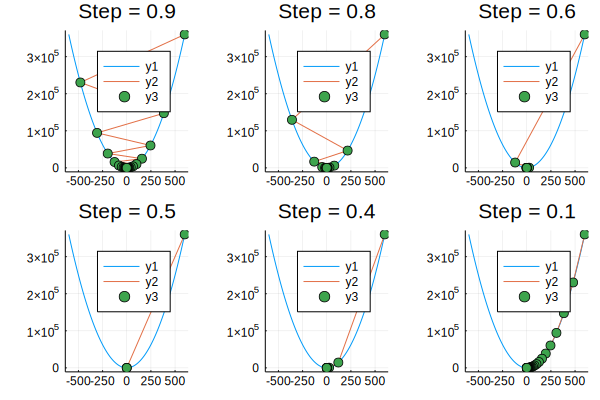

In [120]:
function compareStepSizes(x0, stepArray, thisLayout = (2,2))
    
    pltList = Any[]
    
    for (ind, alpha) in enumerate(stepArray)
        fsq1(x) = x^2
        dfdx1(x) = 2 * x

        xIterations = gradNaiveToler(x0, dfdx1, alpha, 0.1, 1000)

        xRange = -x0:x0

        plt = plot(collect(xRange), fsq1, title = "Step = $alpha")
        plot!(xIterations, fsq1)
        scatter!(xIterations, fsq1, markersize=5)
        
        push!(pltList, plt)
    end
    
    plot(pltList..., layout = thisLayout)
end

xInit = 600
stepSizes = [0.9, 0.8, 0.6, 0.5, 0.4, 0.1]
layout = (2, 3)

compareStepSizes(xInit, stepSizes, layout)

## Now we make a _naive_ Gradient Descent with tolerance on 2-Variable Function

In [139]:
function gradNaiveToler2Var(xInit, gradX, alphaStep, tolerance = 0.5, maxIter = 10)
    # xInit is the initial point
    
    xNext = xInit
    xPrev = xInit
    xError = tolerance * 1000
    
    iterations = []
    push!(iterations, xInit)
    
    numIter = 1
    
    while xError > tolerance
        xPrev = xNext
        xNext = xNext - alphaStep * gradX(xNext)
        
        xError = norm(xPrev - xNext, 2)
        
        push!(iterations, xNext)
        
        if numIter >= maxIter
           break
        else
            numIter += 1
        end
    end
    
    println("Finished in $numIter")
    
    return iterations
    
end

gradNaiveToler2Var (generic function with 3 methods)

In [159]:
firstDervfsq2 = [2 0; 0 2]

dfsq2(x) = firstDervfsq2 * x

x0 = [600, 400]
alphaVal = 0.8
tol = 0.1
maxNum = 100

itersEnd = gradNaiveToler2Var(x0, dfsq2, alphaVal, tol, maxNum)

Finished in 21


21-element Array{Any,1}:
 [600, 400]              
 [-360.0, -240.0]        
 [216.0, 144.0]          
 [-129.6, -86.4]         
 [77.76, 51.84]          
 [-46.656, -31.104]      
 [27.9936, 18.6624]      
 [-16.7962, -11.1974]    
 [10.0777, 6.71846]      
 [-6.04662, -4.03108]    
 [3.62797, 2.41865]      
 [-2.17678, -1.45119]    
 [1.30607, 0.870713]     
 [-0.783642, -0.522428]  
 [0.470185, 0.313457]    
 [-0.282111, -0.188074]  
 [0.169267, 0.112844]    
 [-0.10156, -0.0677066]  
 [0.060936, 0.040624]    
 [-0.0365616, -0.0243744]
 [0.021937, 0.0146246]   

Finished in 21
Finished in 8


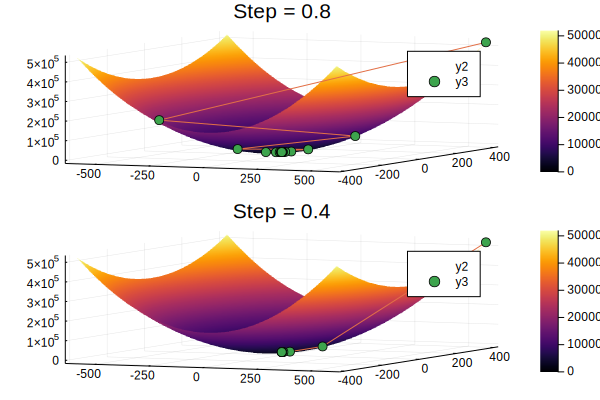

In [170]:
function compareStepSizes2Var(x0, stepArray, thisLayout = (2,2))
    
    pltList = Any[]
    
    for (ind, alphaHere) in enumerate(stepArray)
        
        firstDervfsq2 = [2 0; 0 2]
        dfsq2(x) = firstDervfsq2 * x
        fsq2(x, y) = x^2 + y^2;
        
        tol = 0.1
        maxNum = 100

        iterations = gradNaiveToler2Var(x0, dfsq2, alphaHere, tol, maxNum)
        
        xVals = [r[1] for r in iterations]
        yVals = [r[2] for r in iterations]
        
        fxyArray = [fsq2(xVals[ind], yVals[ind]) for ind in 1:length(xVals)]

        xRange = -x0[1]:x0[1]
        yRange = -x0[2]:x0[2]

        plt = plot(collect(xRange), collect(yRange), fsq2, title = "Step = $alphaHere", st = [:surface], alpha = 0.2)
#         display(plt)
        plot!(xVals, yVals, fxyArray)
        scatter!(xVals, yVals, fxyArray, markersize=5)
        
        push!(pltList, plt)
    end
    
    plot(pltList..., layout = thisLayout)
end

x0 = [600, 400]
stepArray = [0.8, 0.4]
layout = (2, 1)

# gradNaiveToler2Var(x0, dfsq2, alphaVal, tol, maxNum)
compareStepSizes2Var(x0, stepArray, layout)

Finished in 21
Finished in 8


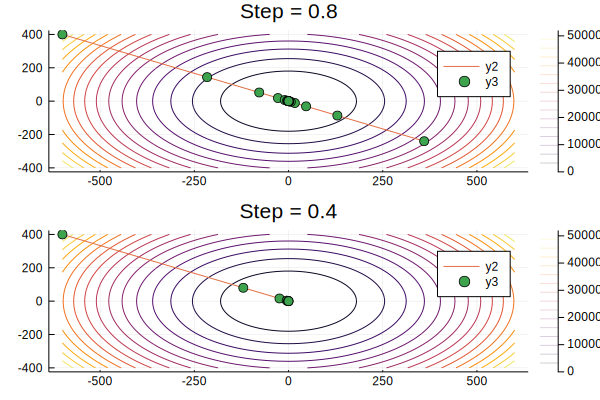

In [199]:
function compareStepSizes2Var(x0, stepArray, thisLayout = (2,2))
    
    pltList = Any[]
    
    for (ind, alphaHere) in enumerate(stepArray)
        
        firstDervfsq2 = [2 0; 0 2]
        dfsq2(x) = firstDervfsq2 * x
        fsq2(x, y) = x^2 + y^2;
        
        tol = 0.1
        maxNum = 100

        iterations = gradNaiveToler2Var(x0, dfsq2, alphaHere, tol, maxNum)
        
        xVals = [r[1] for r in iterations]
        yVals = [r[2] for r in iterations]
        
        fxyArray = [fsq2(xVals[ind], yVals[ind]) for ind in 1:length(xVals)]

        if x0[1] > 0
            xRange = -x0[1]:x0[1]
        else
            xRange = x0[1]:-x0[1]
        end
        
        if x0[2] > 0
            yRange = -x0[2]:x0[2]
        else
            yRange = x0[2]:-x0[2]
        end

        plt = plot(collect(xRange), collect(yRange), fsq2, title = "Step = $alphaHere", st = [:contour], alpha = 0.2)
#         display(plt)
        plot!(xVals, yVals)
        scatter!(xVals, yVals, markersize=5)
        
        push!(pltList, plt)
    end
    
    plot(pltList..., layout = thisLayout)
end

x0 = [-600, 400]
stepArray = [0.8, 0.4]
layout = (2, 1)

# gradNaiveToler2Var(x0, dfsq2, alphaVal, tol, maxNum)
compareStepSizes2Var(x0, stepArray, layout)

## Now we add back the $C$ Matrix

Finished in 30
Finished in 30
Finished in 30


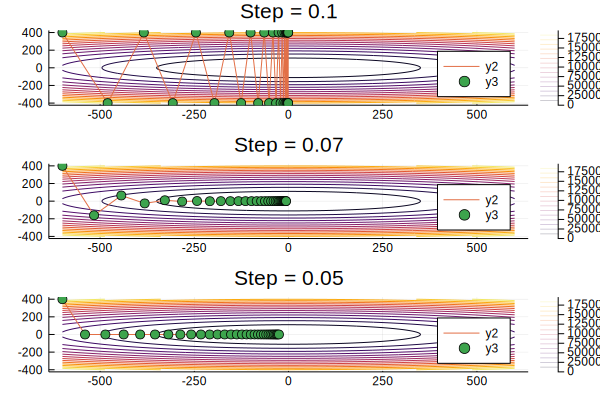

In [198]:
function compareStepSizes2Var(x0, stepArray, thisLayout = (2,2))
    
    pltList = Any[]
    
    for (ind, alphaHere) in enumerate(stepArray)
        
        cMatHere = cMat(100, 2)
        
        firstDervfsq2 = [2 0; 0 2]
        dfsq2(x) = cMatHere * firstDervfsq2 * x
        fsq2(x, y) = cMatHere[1, 1] * x^2 + cMatHere[2, 2] * y^2;
        
        tol = 0.1
        maxNum = 30

        iterations = gradNaiveToler2Var(x0, dfsq2, alphaHere, tol, maxNum)
        
        xVals = [r[1] for r in iterations]
        yVals = [r[2] for r in iterations]
        
        fxyArray = [fsq2(xVals[ind], yVals[ind]) for ind in 1:length(xVals)]
        
        if x0[1] > 0
            xRange = -x0[1]:x0[1]
        else
            xRange = x0[1]:-x0[1]
        end
        
        if x0[2] > 0
            yRange = -x0[2]:x0[2]
        else
            yRange = x0[2]:-x0[2]
        end
        

        plt = plot(collect(xRange), collect(yRange), fsq2, title = "Step = $alphaHere", st = [:contour], alpha = 0.2)
#         display(plt)
        plot!(xVals, yVals)
        scatter!(xVals, yVals, markersize=5)
        
        push!(pltList, plt)
    end
    
    plot(pltList..., layout = thisLayout)
end

x0 = [-600, 400]
stepArray = [0.1, 0.07, 0.05]
layout = (3, 1)

# gradNaiveToler2Var(x0, dfsq2, alphaVal, tol, maxNum)
compareStepSizes2Var(x0, stepArray, layout)

# Adaptive Stepsize